In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame,Series
import seaborn as sns

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [31]:
data = pd.read_csv('data.csv')

In [32]:
data.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


In [33]:
data_encoded = data.copy()

In [34]:
for label in ['State', 'Type_code', 'Type', 'Gender', 'Age_group']:
    data_encoded[label] = LabelEncoder().fit_transform(data_encoded[label]) 

In [35]:
data_encoded.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,0,2001,0,37,0,1,0
1,0,2001,0,0,0,1,0
2,0,2001,0,19,0,1,0
3,0,2001,0,51,0,1,0
4,0,2001,0,26,0,1,0
5,0,2001,0,30,0,1,0
6,0,2001,0,35,0,1,0
7,0,2001,0,48,0,1,0
8,0,2001,0,57,0,1,0
9,0,2001,0,29,0,1,0


sns.pairplot(data_encoded,kind='scatter')
plt.show()

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
x = data_encoded.iloc[:,[2,5]].values
y  = data_encoded.iloc[:,4].values

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0, test_size=0.25)

x_train= x_train.astype(float)
x_test = x_test.astype(float)
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().transform(x_test)

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [46]:
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [48]:
report  = classification_report(y_test,y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.50      0.55      0.53     29894
          1       0.50      0.45      0.47     29486

avg / total       0.50      0.50      0.50     59380



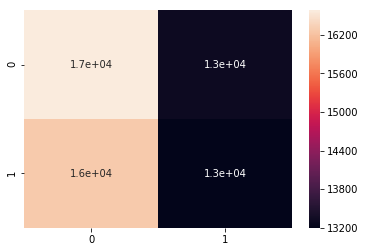

In [49]:
con= confusion_matrix(y_test,y_pred)
sns.heatmap(con, annot=True)

In [50]:
print(accuracy_score(y_test,y_pred)*100)

50.148198046480296
